In [510]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

sns.set_style("ticks")
sns.set_style('whitegrid')

In [511]:
df = pd.read_csv("data/cleaned_final_data.csv") # OR USE searchData/limitData
df = df.dropna()
df = df.drop_duplicates()
print(df.dtypes)
df.sample(frac=1).head(5)

year                       int64
month                      int64
region                    object
town                      object
block                     object
street_name               object
lease_commence_date        int64
month_remaining_lease      int64
flat_type                 object
flat_model                 int64
floor_area_sqm           float64
storey_range_low           int64
storey_range_high          int64
nearest_mrt               object
min_dist_mrt             float64
nearest_mall              object
min_dist_mall            float64
min_dist_town_in_km      float64
total_population         float64
cpi                      float64
psi                        int64
resale_price             float64
dtype: object


,year,month,region,town,block,street_name,lease_commence_date,month_remaining_lease,flat_type,flat_model,...,storey_range_high,nearest_mrt,min_dist_mrt,nearest_mall,min_dist_mall,min_dist_town_in_km,total_population,cpi,psi,resale_price
2,2017,1,central,ANG MO KIO,602,ANG MO KIO AVENUE 5,1980,749,3 ROOM,12,...,3,LENTOR MRT STATION,0.481960,Broadway Plaza,1.528020,9.893601,1.653498,99.026,29,262000.0
116055,2021,12,central,TOA PAYOH,17,LORONG 7 TOA PAYOH,1971,578,3 ROOM,5,...,9,TOA PAYOH MRT STATION,1.103073,HDB Hub,0.897353,4.829828,1.544868,104.439,52,335000.0
121393,2022,3,west,CHOA CHU KANG,690A,CHOA CHU KANG CRESCENT,2003,962,5 ROOM,5,...,9,YEW TEE MRT STATION,0.741174,Yew Tee Square,0.722333,16.554021,1.670454,106.691,30,498000.0
31711,2018,7,north,SEMBAWANG,352A,CANBERRA ROAD,2001,989,5 ROOM,5,...,9,SEMBAWANG MRT STATION,0.186340,Sun Plaza,0.274403,17.821587,1.671586,99.359,28,460000.0
134598,2022,9,west,BUKIT BATOK,289A,BUKIT BATOK STREET 25,1997,892,EXECUTIVE,3,...,12,BUKIT BATOK MRT STATION,1.319096,West Mall,1.425618,11.727703,1.670454,110.339,47,845000.0


In [512]:
cleaned_df = df.groupby(["year", "month", "town", "flat_type"])[
    'month_remaining_lease', 'floor_area_sqm',
    'storey_range_low', 'storey_range_high',
    'min_dist_mrt', 'min_dist_mall', 'min_dist_town_in_km', 'total_population', 'cpi', 'psi', 'resale_price'].mean()

cleaned_df.reset_index(inplace=True)

/var/folders/dh/hgl_kbnx491bp562snpkpz3r0000gn/T/ipykernel_56501/635435189.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cleaned_df = df.groupby(["year", "month", "town", "flat_type"])[


In [513]:
'''
features = ["year", "month", 'month_remaining_lease', 'floor_area_sqm', 'storey_range_low', 'storey_range_high','min_dist_mrt', \
    'min_dist_mall', 'min_dist_town_in_km', 'total_population', 'cpi', 'psi']
target = "resale_price"
        
X = cleaned_df[features]
y = cleaned_df[target]

from sklearn.feature_selection import RFE
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), step=10)
fit = rfe.fit(X, y)
columns=[]
for i in range(len(fit.support_)):
    if fit.support_[i]:
        columns.append(features[i])

print("Columns with predictive power:", columns )
'''

'\nfeatures = ["year", "month", \'month_remaining_lease\', \'floor_area_sqm\', \'storey_range_low\', \'storey_range_high\',\'min_dist_mrt\',     \'min_dist_mall\', \'min_dist_town_in_km\', \'total_population\', \'cpi\', \'psi\']\ntarget = "resale_price"\n        \nX = cleaned_df[features]\ny = cleaned_df[target]\n\nfrom sklearn.feature_selection import RFE\nrfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), step=10)\nfit = rfe.fit(X, y)\ncolumns=[]\nfor i in range(len(fit.support_)):\n    if fit.support_[i]:\n        columns.append(features[i])\n\nprint("Columns with predictive power:", columns )\n'

In [537]:
class RFTimeMode:
    def __init__(self, df, town, flat_type):
        self.town = town
        self.flat_type = flat_type
        self.features = ["year", "month", 'month_remaining_lease', 'floor_area_sqm', 'storey_range_high', 'min_dist_town_in_km', 'cpi']
        self.target = "resale_price"
    
        self.df = df.loc[(df['town'] == town) & (df['flat_type'] == flat_type)]
        self.df = self.df[self.features + [self.target]]
        
        self.df = self.normalize(self.df)
        
        self.X_train,self.X_test, self.y_train, self.y_test = train_test_split(self.df[self.features], self.df[self.target], test_size=0.2, shuffle=False)
    
    def normalize(self, df):
        cols_to_norm = ['month_remaining_lease', 'floor_area_sqm', 'storey_range_high', 'min_dist_town_in_km', 'cpi', 'resale_price']
        df[cols_to_norm] = MinMaxScaler().fit_transform(df[cols_to_norm])
        return df
    
    def fit(self, n_estimators= 100, step_size=10):            
        # Get MSE score per epoch
        mse_train = []
        mse_test = []
        epochs = range(1, n_estimators+1, step_size)
        for epoch in epochs:
            RF_Model = RandomForestRegressor(n_estimators=epoch)
            self.rgr=RF_Model.fit(self.X_train[self.features], self.y_train)
            
            y_pred_train = self.rgr.predict(self.X_train)
            y_pred_test = self.rgr.predict(self.X_test)
            mse_train.append(mean_squared_error(self.y_train, y_pred_train))
            mse_test.append(mean_squared_error(self.y_test, y_pred_test))
        
        #plt.plot(epochs, mse_test, label='test')
        plt.plot(epochs, mse_train, label='train')
        plt.xlabel('Epochs')
        plt.ylabel('MSE')
        plt.title('Random Forest Regressor Epochs against MSE for ' + self.town + ' ' + self.flat_type)
        plt.legend()
        plt.show()

    def pred(self, pred_x_df):
        if set(pred_x_df.columns) != set(self.features):
            raise Exception("Columns do not match")
        predicted_y =  pd.DataFrame(self.rgr.predict(pred_x_df[self.features])).rename(columns={0: "predicted_resale_price"})
        pred_df = pd.concat([pred_x_df.reset_index(drop=True), predicted_y], axis=1)
        pred_df['date'] = pd.to_datetime(pred_df[["year", "month"]].assign(DAY=1))
        return pred_df
    
    def test(self):
        test_df = self.X_test[self.features].reset_index(drop=True)
        final_df = self.pred(test_df)
        final_df = pd.concat([final_df, self.y_test.reset_index(drop=True)], axis=1)
        final_df = final_df.sort_values(by="date")
        
        # Plot Trend
        plt.figure(figsize=(10, 5))
        data = self.df.copy()
        data["date"] = pd.to_datetime(data[["year", "month"]].assign(DAY=1))
        sns.lineplot(data=data, x="date", y="resale_price", label="Actual Resale Price")
        sns.lineplot(data=final_df, x="date", y="predicted_resale_price", label="Precicted Resale Price")
        plt.xticks(rotation=90)
        plt.xlabel("Date")
        plt.ylabel("Resale Price")
        plt.title("Resale Price Trend for {} {}".format(self.town, self.flat_type))
        plt.show()
        
        # Plot Diff
        final_df['diff']=final_df.predicted_resale_price - final_df.resale_price
        final_df['diff'].plot(kind='bar', title="Resale Price Difference for {} {}".format(self.town, self.flat_type))
        
        print("R2:", r2_score(final_df.resale_price, final_df.predicted_resale_price))
        print("MAE:", mean_absolute_error(final_df.resale_price, final_df.predicted_resale_price))
        print("MSE:", mean_squared_error(final_df.resale_price, final_df.predicted_resale_price))
        print("RMSE:", np.sqrt(mean_squared_error(final_df.resale_price, final_df.predicted_resale_price)))
        


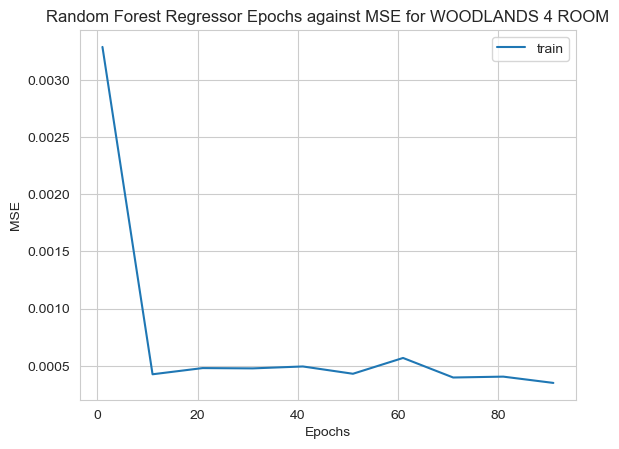

<AxesSubplot:xlabel='date', ylabel='predicted_resale_price'>

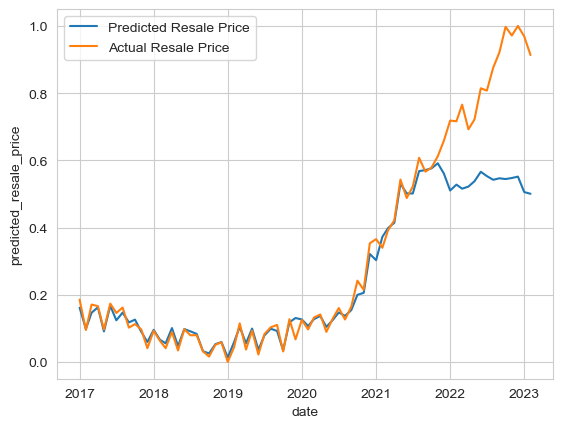

In [544]:
test_data = cleaned_df.copy()
model = RFTimeMode(test_data, "WOODLANDS", "4 ROOM")
model.fit()

pred = model.pred(model.df[["year", "month", 'month_remaining_lease', 'floor_area_sqm', 'storey_range_high', 'min_dist_town_in_km', 'cpi']])
pred["date"] = pd.to_datetime(pred[["year", "month"]].assign(DAY=1))
sns.lineplot(data=pred, x="date", y="predicted_resale_price", label="Predicted Resale Price")

test_data = model.df.copy()
test_data['date'] = pd.to_datetime(test_data[["year", "month"]].assign(DAY=1))
sns.lineplot(data=test_data, x="date", y="resale_price", label="Actual Resale Price")

In [545]:
class PredFuture:
    def __init__(self, df, town, flat_type, num_future_months):
        self.town = town
        self.flat_type = flat_type
        self.num_future_months = num_future_months
        self.target = "resale_price"
        
        self.get_model(df)
    
    def get_model(self, df):
        self.model = RFTimeMode(df, self.town, self.flat_type)
        self.model.fit()
        self.model.test()

    def preprocess_data(self):
        print("Predicting resale price for", self.town, self.flat_type, "flat for the next", self.num_future_months, "months")
        self.model.df["date"] = pd.to_datetime(self.model.df[["year", "month"]].assign(DAY=1))
        latest_date = pd.to_datetime(self.model.df["date"].max()) + pd.DateOffset(months=1)
        new_date = pd.to_datetime(latest_date) + pd.DateOffset(months=self.num_future_months - 1)
        future_df = pd.DataFrame(pd.date_range(start=f'{latest_date}', end=f'{new_date}'), columns=['date'])
        future_df["year"] = future_df["date"].dt.year
        future_df["month"] = future_df["date"].dt.month
        future_df.drop("date", axis=1, inplace=True)
        future_df.drop_duplicates(inplace=True)
        future_df = future_df.reset_index(drop=True)
        features = self.model.features.copy()
        features.remove("year")
        features.remove("month")
        future_df = pd.concat([future_df, self.model.df.sample(n = self.num_future_months).reset_index(drop=True)[features]], axis=1)
        pred_df = self.model.pred(future_df)
        pred_df["town"] = self.town
        pred_df["flat_type"] = self.flat_type
        return pred_df
    
    def plot(self, predicted_df):
        plt.figure(figsize=(10, 5))
        predicted_df = predicted_df.rename(columns={"predicted_resale_price": "resale_price"})
        data = pd.concat([self.model.df, predicted_df], axis=0)
        sns.lineplot(data=data, x="date", y="resale_price", color="red")
        sns.lineplot(data=self.model.df, x="date", y="resale_price", label="Resale Price", color="blue")
        sns.lineplot(data=predicted_df, x="date", y="resale_price", label="Predicted Resale Price", color="red")
        plt.xticks(rotation=90)
        plt.title("Resale Price Trend for {} {}".format(self.town, self.flat_type))
        plt.show()
        
        

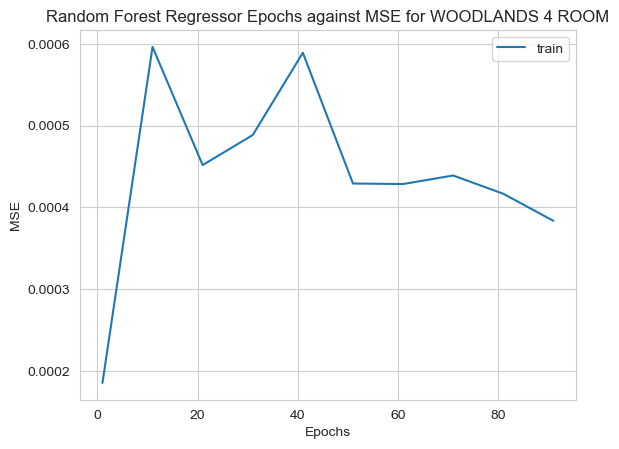

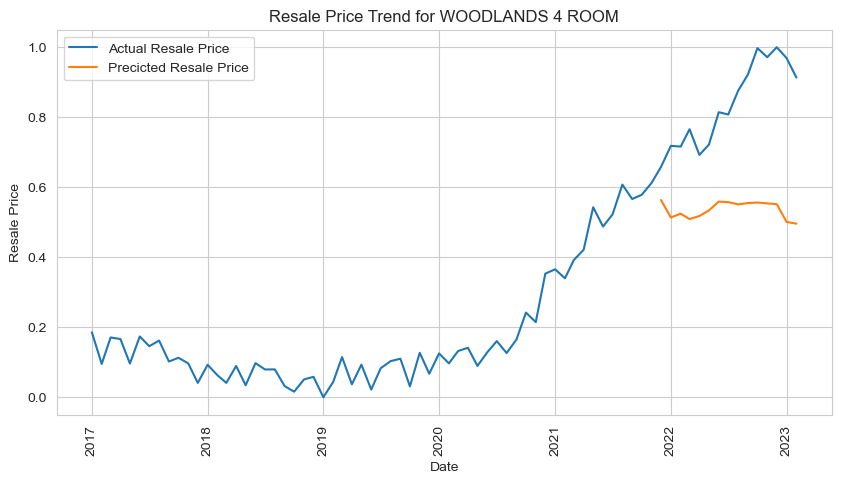

R2: -6.615786186043934
MAE: 0.3000078636207811
MSE: 0.10336685446790746
RMSE: 0.32150716083457215
Predicting resale price for WOODLANDS 4 ROOM flat for the next 4 months


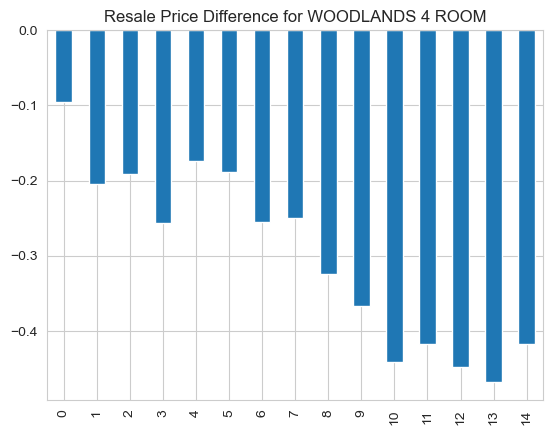

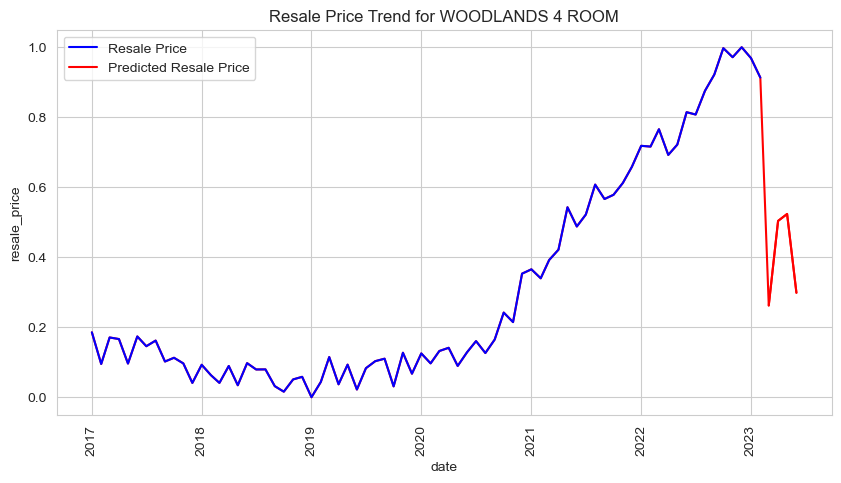

,date,town,flat_type,month_remaining_lease,floor_area_sqm,storey_range_high,min_dist_town_in_km,cpi,predicted_resale_price
0,2023-03-01,WOODLANDS,4 ROOM,0.51716,0.37281,0.51643,0.76472,0.07410,0.26206
1,2023-04-01,WOODLANDS,4 ROOM,0.61874,0.87328,0.60663,0.27088,0.23749,0.50371
2,2023-05-01,WOODLANDS,4 ROOM,0.81386,0.29418,0.45962,0.24922,0.93734,0.52356
3,2023-06-01,WOODLANDS,4 ROOM,0.54956,0.28489,0.37230,0.74910,0.02152,0.29846


In [546]:
pred_model = PredFuture(cleaned_df, "WOODLANDS", "4 ROOM", 4)
predicted_df = pred_model.preprocess_data()
pred_model.plot(predicted_df)
predicted_df[['date', 'town', 'flat_type', 'month_remaining_lease', 'floor_area_sqm',
       'storey_range_high', 'min_dist_town_in_km', 'cpi',
       'predicted_resale_price']].round(5)

In [543]:
pred_model.model.df.head(5)

,year,month,month_remaining_lease,floor_area_sqm,storey_range_high,min_dist_town_in_km,cpi,resale_price,date
96,2017,1,0.381913,0.779186,0.456024,0.367674,0.022568,0.185424,2017-01-01
198,2017,2,0.486994,0.082142,0.673888,0.587565,0.022343,0.094970,2017-02-01
303,2017,3,0.566769,0.618330,0.826982,0.479772,0.025427,0.170728,2017-03-01
410,2017,4,0.584547,0.692428,0.320350,0.410470,0.002708,0.166180,2017-04-01
513,2017,5,0.347189,0.350114,0.759510,0.834940,0.027985,0.096177,2017-05-01
